In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 28.1MB/s 
     |████████████████████████████████| 1.2MB 49.9MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 204kB 58.3MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

## Importing Data and creating DataLoaders

In [3]:
path = untar_data(URLs.PETS)

In [4]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)

In [5]:
dls = pets.dataloaders(path/'images')

## Training an initial model

In [32]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.004365158267319202)

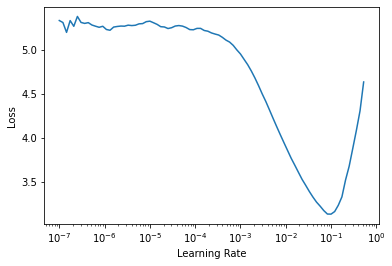

In [24]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.168476,0.321826,0.100812,01:07
1,0.541519,0.242227,0.074425,01:07
2,0.323017,0.211020,0.064953,01:07


In [34]:
learn.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.311311274956097e-06)

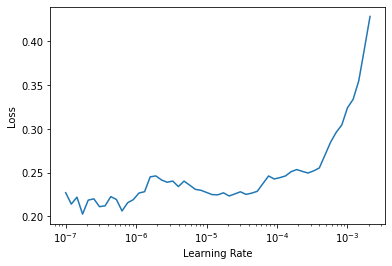

In [30]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(5, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.257615,0.203990,0.066982,01:12
1,0.254997,0.203267,0.063599,01:12
2,0.208274,0.198458,0.056157,01:11
3,0.202479,0.192761,0.056157,01:13
4,0.187401,0.192808,0.052774,01:12
